In [1]:
#importing major libralies and modules

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


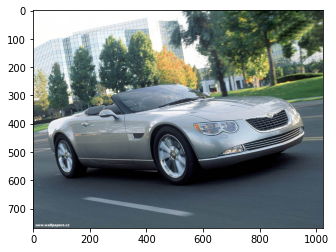

In [3]:
#Loading an image to test

img =  image.load_img("training/cars/HEMI.jpg")
plt.imshow(img)

In [4]:
#reshaping the images to an equal matrix shape

train =  ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
#Preparing the training dataset that may be suitable to be fed on the CNN

training_dataset = train.flow_from_directory("training/",#directory containing all datasets for training
                                             target_size = (200,200), #size of the images
                                             batch_size = 30, #Size of force to the CNN
                                             class_mode = "binary" #Response of the lebbel to be given to each group classfied
                                            )

Found 19 images belonging to 3 classes.


In [6]:
#Preparing the validation dataset that may be suitable to be fed on the CNN

validation_dataset = validation.flow_from_directory("validation/",
                                                   target_size = (200,200),
                                                    batch_size = 30,
                                                    class_mode = "binary"
                                                   )

Found 19 images belonging to 3 classes.


In [7]:
#Finding out the binary name assigned to each group

training_dataset.class_indices

{'aeroplane': 0, 'cars': 1, 'motorcycle': 2}

In [8]:
#Innitiallizing a CNN

model = tf.keras.models.Sequential([
    #Layer 01
    tf.keras.layers.Conv2D(
    16,(3,3),#number of filters, size of the layer
    activation = "relu",input_shape = (200,200,3 )),
    tf.keras.layers.MaxPool2D(2,2),
    
    #Layer 02
    tf.keras.layers.Conv2D(
    32,(3,3),#number of filters, size of the layer
    activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    #Layer 03
    tf.keras.layers.Conv2D(
    32,(3,3),#number of filters, size of the layer
    activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    #Flattening
     tf.keras.layers.Flatten(),
    
    #Dense layers
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
    
    
])

In [9]:
#compiling the model, would be shown when the model is compiled

model.compile(
    
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]

)

In [14]:
#model fitting

model_fitting = model.fit(
    training_dataset,
    steps_per_epoch = 1,
    epochs = 40,
    validation_data = validation_dataset

)

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: -6063.8906 - accuracy: 0.6842 - val_loss: -6049.7500 - val_accuracy: 0.8947
Epoch 2/40
1/1 [==============================] - 1s 970ms/step - loss: -6049.7500 - accuracy: 0.8947 - val_loss: -7690.5327 - val_accuracy: 0.6842
Epoch 3/40
1/1 [==============================] - 1s 987ms/step - loss: -7690.5327 - accuracy: 0.6842 - val_loss: -8673.6602 - val_accuracy: 0.7895
Epoch 4/40
1/1 [==============================] - 1s 972ms/step - loss: -8673.6602 - accuracy: 0.7895 - val_loss: -9233.7266 - val_accuracy: 0.6842
Epoch 5/40
1/1 [==============================] - 1s 1s/step - loss: -9233.7266 - accuracy: 0.6842 - val_loss: -9567.3252 - val_accuracy: 0.8421
Epoch 6/40
1/1 [==============================] - 1s 1s/step - loss: -9567.3252 - accuracy: 0.8421 - val_loss: -11583.7930 - val_accuracy: 0.7368
Epoch 7/40
1/1 [==============================] - 1s 1s/step - loss: -11583.7930 - accuracy: 0.7368 - val_loss: -13007.8

In [82]:
#Saving model

# model.save("model.h5")

In [ ]:
#Loading model
# from keras.models import load_model
# loading = load_model("")